In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import matplotlib.colors as mcolors
from numpy.random import multivariate_normal
from scipy import stats
import pandas as pd
from pandas import read_csv

In [2]:
file='spectra.csv'
data = ascii.read(file,format='csv')

#first epoch spectra of PS1-11aop
l = data['waves1']
flux = data['flux_corr1']
fluxerr = data['fluxerror']

#second epoch spectra of PS1-11aop
lg = data['waves2']
fluxg = data['flux_corr2']

#host galaxy spectra
lga = data['wavesg']
fluxga = data['flux_corrg']

In [188]:
#fluxga

[]

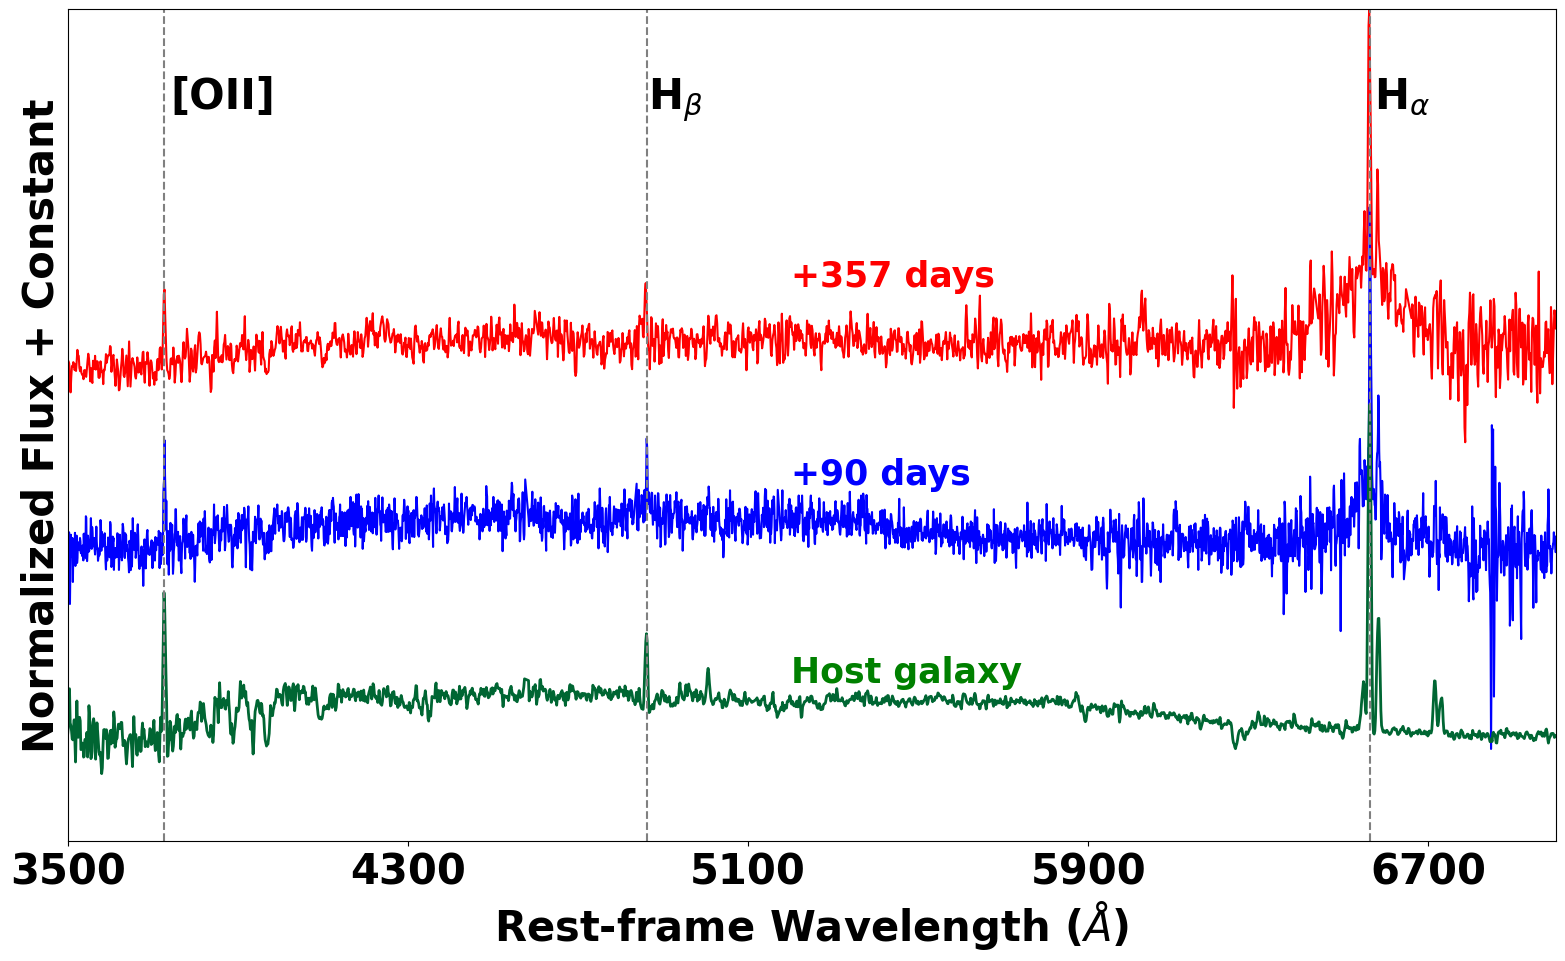

In [18]:
def norm(data):
    return (data)/max(data)
from matplotlib import rc,rcParams
rc('font', weight='bold')
fig,ax = plt.subplots(figsize=(19.20,10.80))
#fig, ax = plt.subplots()
offset1 = 0.5
offset2 = 1

indices_to_exclude1 = [2165,2166,2167,2168,2169,2170,1562,1563,1564,1565,1566,1567,1568,1820,1821,1822,1823,1824,1825,1826,3660,3661,3662,3663,3664,3665]
mask1 = np.ones(len(l), dtype=bool)
mask1[indices_to_exclude1] = False
ax.plot(l[mask1],norm(flux*1e15)[mask1]+offset1,color='blue', label = '+ 90 days')

indices_to_exclude2 = [1172,1173,1174,1175,2452,2453,2454,2455,2456,2457,2458]
mask2 = np.ones(len(lg), dtype=bool)
mask2[indices_to_exclude2] = False
ax.plot(lg[mask2],norm(fluxg)[mask2]+offset2,color = 'red', label = ' + 357 days')

indices_to_exclude3 = [923,924,925,926,927,1300,1301,1302,1303,1304]
mask3 = np.ones(len(lga), dtype=bool)
mask3[indices_to_exclude3] = False
ax.plot(lga[mask3],norm(fluxga)[mask3],color = '#006633',linewidth = 2, label = 'Host Galaxy')
#ax.plot(lga,norm(fluxga),color = '#006633',linewidth = 2, label = 'Host Galaxy')
ax.tick_params(labelsize=30)

plt.ylabel(r'Normalized Flux + Constant',fontsize=30,fontweight='bold')
plt.xlabel(r'Rest-frame Wavelength ($\AA$)',fontsize=30,fontweight='bold')
ax.xaxis.set_ticks(np.arange(3500, 7000, 800))
plt.rcParams['axes.grid'] = False
#plt.legend(loc ='upper left', fontsize =30)
ax.set_xlim(3500,7000)
ax.set_ylim(-0.1,2)

ax.axvline(x=6562.852, linestyle = '--', ymin=0, ymax=1, color = 'gray')
ax.text(6572,1.75, r'H$_\alpha$', fontsize=30)
ax.axvline(x=4861.33, linestyle = '--', ymin=0, ymax=1, color = 'gray')
ax.text(4865,1.75, r'H$_\beta$', fontsize=30)
ax.axvline(x=3727, linestyle = '--',ymin=0, ymax=1, color = 'gray')
ax.text(3740,1.75, r'[OII]', fontsize=30)

ax.text(5200, 1.3,'+357 days', color='red',fontsize =25)
ax.text(5200, 0.8,'+90 days', color='blue',fontsize =25)
ax.text(5200, 0.3,'Host galaxy', color='green',fontsize =25)

ax.axes.get_yaxis().set_ticks([])

#plt.show()
#plt.savefig('spectrum.png')
#plt.savefig('spectrum.png', dpi = 300, transparent = True)

## Subtract Sky lines

In [19]:
h5 = [923,924,925,926,927,1300,1301,1302,1303,1304,2359, 2421]
h1 = [2395,2396,2397,2398,2399,2400,2179,2175,2176,2177,2178,2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2194, 2195, 2196,
       2197, 2198, 2199, 2280, 2281, 3195,3196,3197,3198,3199,3200, 3201, 3320, 3321,3322,3323,3324,3325] 
h2 = [1330,1331,1332,1333,1334,1335,1336,1337]
h3 =[624,625,626, 627,628,629]
h4 =[2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475]
indices_to_exclude = h1+h2+h3+h4+h5

#condition = (fluxmag > 0.6e-7) 
#indices_to_exclude = np.where(condition)[0]
mask = np.ones(len(lga), dtype=bool)
mask[indices_to_exclude] = False

plt.plot(lambd[mask],fluxmag[mask],'m') #2398, 1335, 627,2468

IndexError: boolean index did not match indexed array along dimension 0; dimension is 3548 but corresponding boolean dimension is 4543

In [41]:
#convert from observer frame to rest-frame
np.array([5577, 5892, 6300])/(1+z)

array([4578.81773399, 4837.43842365, 5172.4137931 ])

In [40]:
masked_array = np.array([4578.81773399,  4862.346827, 5172.4137931,4602.81,4580,4834,6645,6562.852,4861.33,3727,6674]) #sky night lines at rest frame wavelength
value_to_find = masked_array[10]
index_nearest = np.argmin(np.abs(lg - value_to_find)) #lg =[1172,1173,1174,1175], l = [2165,2166,2167,2168,2169,2170
indices_to_exclude = [2165,2166,2167,2168,2169,2170,1562,1563,1564,1565,1566,1567,1568,1820,1821,1822,1823,1824,1825,1826] #[923,924,925,926,927,1300,1301,1302,1303,1304]
#mask = np.ones(len(lga), dtype=bool)  #[3660,3661,3662,3663,3664,3665]
#mask[indices_to_exclude] = False
index_nearest #2398, 1335, 627,2468


2468

(5950.0, 6700.0)

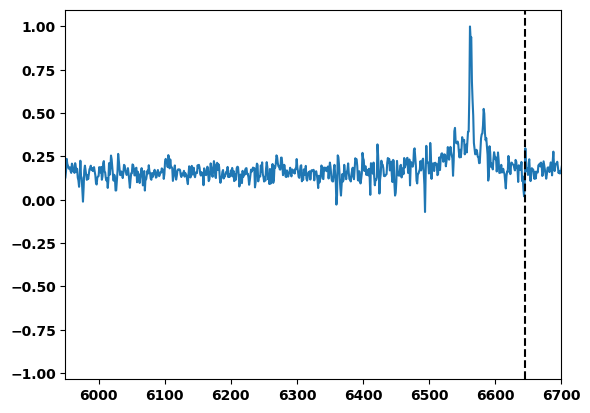

In [248]:
mask=[2454,2455,2456,2457,2458,2459]

# Create a mask to exclude specific indices
mask = np.ones(len(l), dtype=bool)
mask[indices_to_exclude] = False
# Plot the data with the specified points excluded
plt.plot(l[mask], norm(flux)[mask], linestyle='-', label='Data with Exclusions')
#plt.plot(lg, norm(fluxg), linestyle='-', label='Data with Exclusions')
#plt.axvline(x=4580.81773399, linestyle = '--',ymin=0, ymax=1, color = 'k')
plt.axvline(x=6645, linestyle = '--',ymin=0, ymax=1, color = 'k')
#plt.axvline(x=5172.4137931, linestyle = '--',ymin=0, ymax=1, color = 'k')
#plt.vlines(x=4861.33, linestyle = '--', ymin=0, ymax=1, color = 'gray')
plt.xlim(5950,6700)

## Account for absorption lines from galaxy

In [3]:
#the model spectrum here are now in rest frame
file_em='/Users/adaezeibik/prospector-old/demo/modelspectraPS11aop-photcorr-withemissiondy.csv'
file_abs='/Users/adaezeibik/prospector-old/demo/modelspectraPS11aop-photcorr2-withabsdy.csv'
data_em = ascii.read(file_em,format='csv')
lambd_em = data_em['waveAng']
fluxmag_em = data_em['fluxmaggies']

data_abs = ascii.read(file_abs,format='csv')
lambd_abs = data_abs['waveAng']
fluxmag_abs = data_abs['fluxmaggies']

In [4]:
def convert_maggie2Angstron(flux_density_maggie, wavelength_Angstrom):
    """
    Convert flux density from maggie erg/cm^2/s/Å.

    Parameters:
    - flux_density_maggie: Flux density in maggies
    - wavelength_Angstrom: Wavelength in Angstrom.

    Returns:
    Flux density in Angstron.
    """
    # Speed of light in cm/s
    speed_of_light_Angstrom_per_s = 3e18
    
    # Calculate frequency in Hertz
    frequency_Hz = speed_of_light_Angstrom_per_s / wavelength_Angstrom

    # Convert maggies to Jansky
    #jansky_conversion_factor = 1e23  # 1 Jy = 1e-23 erg/s/cm^2/Hz
    flux_density_jansky = flux_density_maggie * 3631  # 1 maggie = 3631 Jy
    flux_density_erg_cm2_s_Angstrom = (flux_density_jansky*1e-23 * frequency_Hz) / wavelength_Angstrom

    return flux_density_erg_cm2_s_Angstrom

In [5]:
def convert_flux2Jansky(flux_density_erg_cm2_s_Angstrom, wavelength_Angstrom):
    """
    Convert flux density from erg/cm^2/s/Å to Jansky.

    Parameters:
    - flux_density_erg_cm2_s_Angstrom: Flux density in erg/cm^2/s/Å.
    - wavelength_Angstrom: Wavelength in Angstrom.

    Returns:
    Flux density in maggies.
    """
    # Speed of light in Angstrom/s
    speed_of_light_Angstrom_per_s = 3e18

    # Calculate frequency in Hertz
    frequency_Hz = speed_of_light_Angstrom_per_s / wavelength_Angstrom

    # Convert flux density to Jansky
    jansky_conversion_factor = 1e23  # 1 Jy = 1e-23 erg/s/cm^2/Hz
    flux_density_jansky = (flux_density_erg_cm2_s_Angstrom*wavelength_Angstrom**2)/speed_of_light_Angstrom_per_s * jansky_conversion_factor
    flux_density_maggie=flux_density_jansky/3631

    return flux_density_maggie

In [21]:
#host galaxy spectra
file_modb = pd.read_csv('/Users/adaezeibik/virtual_ubuntu/PS1-11aop/PS1-11aop-host-dered.flm',sep='\s+')
spec_wave = file_modb.iloc[:, 0]
spec_fd1 = file_modb.iloc[:, 1]

lga = spec_wave
fluxga = spec_fd1

#convert obs spectrum from AA to maggies
flux1_obs_maggie = convert_flux2Jansky(spec_fd1*1e-15, spec_wave)
#flux_obs_maggie = convert_flux2Jansky(fluxga*1e-15, lga)

#flux_density_maggie2 = fluxmag_abs
#wavelength_Angstrom2 = lambd_abs
#flux_Ang2 = convert_maggie2Angstron(flux_density_maggie2, wavelength_Angstrom2)

In [22]:
spec_wave[0:5],spec_fd1[0:5]*1e-15, flux1_obs_maggie[0:5]

(0    3120.689655
 1    3122.265816
 2    3123.841976
 3    3125.418136
 4    3126.994297
 Name: lambda2, dtype: float64,
 0    1.249635e-16
 1    1.017619e-16
 2    1.632705e-16
 3    1.894430e-16
 4    9.416210e-17
 Name: flux2, dtype: float64,
 0    1.117215e-08
 1    9.107042e-09
 2    1.462643e-08
 3    1.698820e-08
 4    8.452454e-09
 dtype: float64)

Text(0.5, 0, 'Rest-frame Wavelength ($\\AA$)')

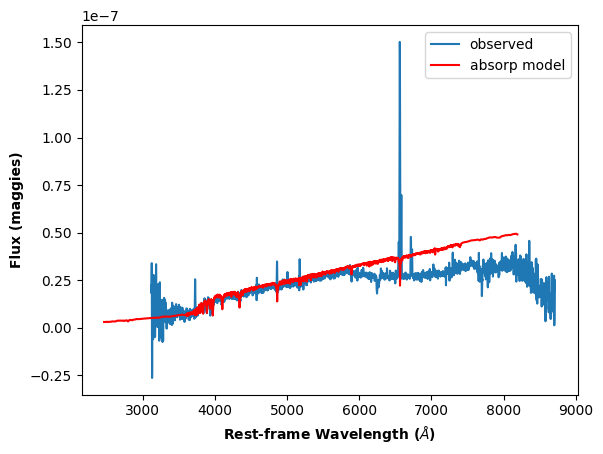

In [40]:
#corrected for exticntion with absorption, dynesty 
plt.plot(spec_wave, flux1_obs_maggie*2,label='observed')
#plt.plot(lambd_abs[281:4623],fluxmag_abs[281:4623],color='red',label='model')
plt.plot(lambd_abs[281:4623],fluxmag_abs[281:4623],color='red',label='absorp model')
plt.legend(fontsize=10)
#plt.xlim(6000,7000)
#plt.ylim(0.1,1e-7)
plt.ylabel(r'Flux (maggies)',fontsize=10,fontweight='bold')
plt.xlabel(r'Rest-frame Wavelength ($\AA$)',fontsize=10,fontweight='bold')
#plt.savefig('example-prospector-noemission.png',dpi = 300,transparent=True,bbox_inches='tight')

Text(0.5, 0, 'Rest-frame Wavelength ($\\AA$)')

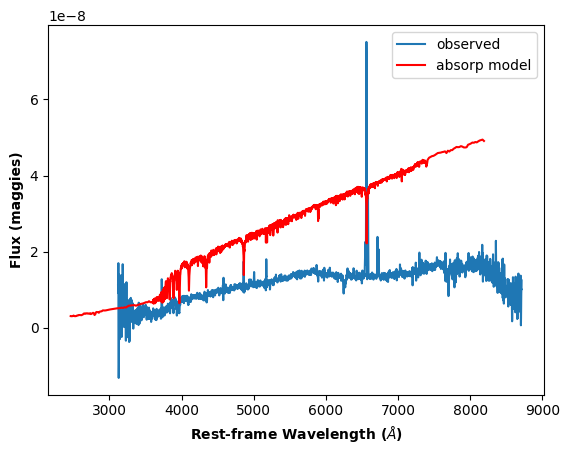

In [24]:
#corrected for exticntion with absorption, dynesty 
plt.plot(lga, flux_obs_maggie,label='observed')
#plt.plot(lambd_abs[281:4623],fluxmag_abs[281:4623],color='red',label='model')
plt.plot(lambd_abs[281:4623],fluxmag_abs[281:4623],color='red',label='absorp model')
plt.legend(fontsize=10)
#plt.xlim(6000,7000)
#plt.ylim(0.1,1e-7)
plt.ylabel(r'Flux (maggies)',fontsize=10,fontweight='bold')
plt.xlabel(r'Rest-frame Wavelength ($\AA$)',fontsize=10,fontweight='bold')
#plt.savefig('example-prospector-noemission.png',dpi = 300,transparent=True,bbox_inches='tight')

Text(0.5, 0, 'Rest-frame Wavelength ($\\AA$)')

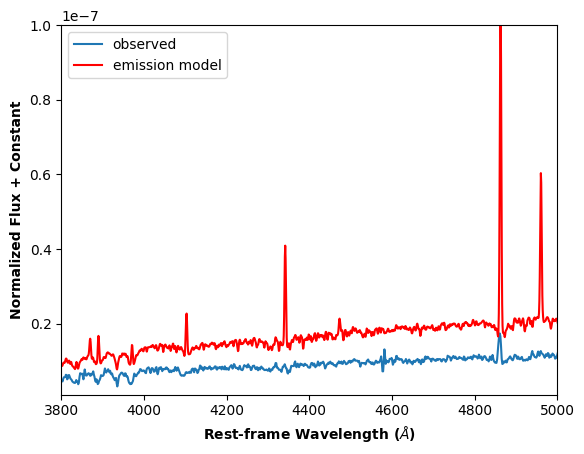

In [25]:
plt.plot(lga, flux_obs_maggie,label='observed')
#plt.plot(lambd_abs[281:4623],fluxmag_abs[281:4623],color='red',label='model')
plt.plot(lambd_em[281:4623],fluxmag_em[281:4623],color='red',label='emission model')
plt.xlim(3800,5000)
plt.ylim(0.01e-7,1e-7)
plt.legend()
plt.ylabel(r'Normalized Flux + Constant',fontsize=10,fontweight='bold')
plt.xlabel(r'Rest-frame Wavelength ($\AA$)',fontsize=10,fontweight='bold')

In [42]:
import numpy as np
#model photometry from phot+spec runs of prospector
wavelength1 = np.array([ 4814.28808341,  6174.34957128,  7515.76770146,  8663.63218297,
         9616.86645988,  3546.00063828,  4669.59393552,  6155.68605117,
         7471.57138923,  8917.3987151 , 33461.02044124, 45952.08977898]) #in observed frame
flux_maggies1 = np.array([1.26044601e-08, 2.21527539e-08, 2.72212480e-08, 2.98616109e-08,
        3.18617479e-08, 3.29408909e-09, 1.11397664e-08, 2.20842504e-08,
        2.70496796e-08, 3.03859202e-08, 1.51367841e-08, 9.98568937e-09])
#model photometry from phot only runs of prospector (This is the one we want to use for correcting the spec for flux calibration)
flux_maggies2 = np.array([1.31110112e-08, 2.45776764e-08, 3.35581441e-08, 4.10393834e-08,4.72908338e-08, 4.41026232e-09, 1.16289919e-08, 2.43806564e-08,3.33109556e-08, 4.26727764e-08, 4.74670439e-08, 3.98600921e-08])
factor_to_multiply = flux_maggies2/flux_maggies1
factor_to_multiply

array([1.04018824, 1.1094637 , 1.23279227, 1.37431914, 1.48425108,
       1.33884124, 1.04391703, 1.10398388, 1.2314732 , 1.40436018,
       3.13587375, 3.99172162])

(1e-09, 1e-07)

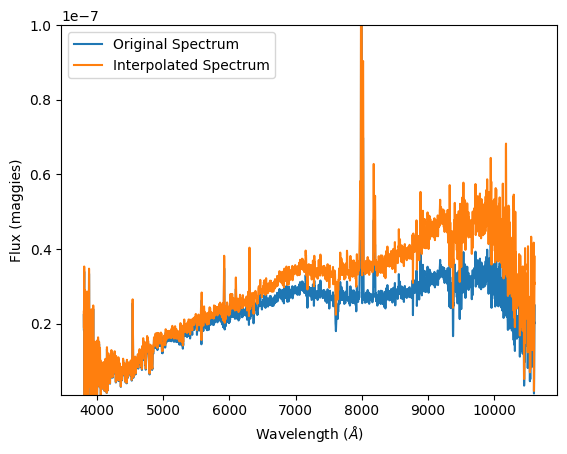

In [43]:
import numpy as np
import matplotlib.pyplot as plt
z = 0.218
# observed
wave = lga*(1+z) # correcting to observed-frame
spectrum = flux_obs_maggie*2 # 

# Define specific wavelengths and their corresponding random multiplier values
known_wavelengths = wavelength1 # Example known wavelengths
multiplier_values = factor_to_multiply   # Example corresponding multiplier values

# Interpolate to obtain multiplier values for all wavelengths
interpolated_multipliers = np.interp(wave, known_wavelengths, multiplier_values)

# Multiply the spectrum by the interpolated multiplier values
spectrum_interpolated = spectrum * interpolated_multipliers

# Plot the original and modified spectra
plt.plot(wave, spectrum, label='Original Spectrum')
plt.plot(wave, spectrum_interpolated, label='Interpolated Spectrum')

#plt.plot(lambd_em[281:4623]*(1+0.218),fluxmag_em[281:4623],color='red',label='model')
#plt.scatter(known_wavelengths, multiplier_values, color='red', label='Known Multiplier Values')
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel('Flux (maggies)')
plt.legend()
plt.ylim(0.01e-7,1e-7)
#plt.savefig('example-prospector-interp.png',dpi = 300,transparent=True,bbox_inches='tight')

In [89]:
wave[0:5], spectrum_interpolated[0:5]

(0    3801.000000
 1    3802.919764
 2    3804.839527
 3    3806.759290
 4    3808.679054
 Name: lambda2, dtype: float64,
 0    2.324227e-08
 1    1.894608e-08
 2    3.042848e-08
 3    3.534186e-08
 4    1.758429e-08
 dtype: float64)

In [44]:
#Save result in a csv file
from astropy.io import ascii
file_out = 'modifiedspectraPS11aop.csv'
data = [wave/(0.218+1), flux1_obs_maggie*2, spectrum_interpolated] #converts back to rest-frame
names = ['waveAng','fluxmaggies','fluxmaggies_adj']
ascii.write(data,file_out,names=names,overwrite=True,format='csv') #

In [45]:

from astropy.io import ascii
#observed (modified to fit photometry)
file_mod='/Users/adaezeibik/Thesis_related/PS11aop_work/paper-figures/modifiedspectraPS11aop.csv'
data_mod = ascii.read(file_mod,format='csv')
lambd2 = data_mod['waveAng'] 
fluxmag2 = data_mod['fluxmaggies_adj'] 

#model absorption spectra
file_model='/Users/adaezeibik/Thesis_related/PS11aop_work/paper-figures/modspectraPS11aop-modelabs.csv'
data_model = ascii.read(file_model,format='csv')
lambd1 = data_model['waveAng']/(1+0.218)
fluxmag1 = data_model['fluxmaggies']

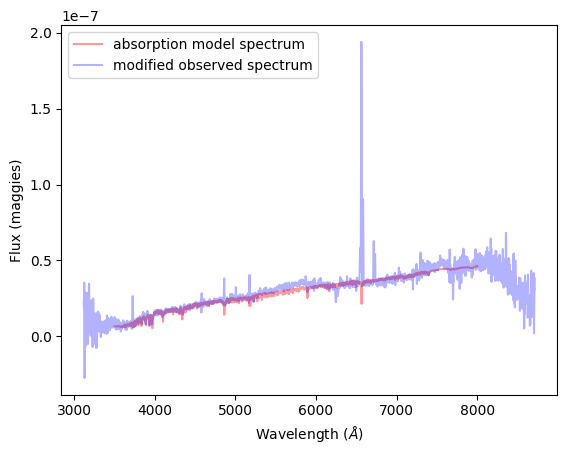

In [46]:
plt.plot(lambd1,fluxmag1,'r',alpha=0.4,label='absorption model spectrum') #model from prospector
plt.plot(lambd2,fluxmag2,'b',alpha=0.3,label='modified observed spectrum') #observed
#plt.plot(wave2, subtracted_spectrum,'orange',alpha=0.4, label='subtracted spectrum')
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel('Flux (maggies)')
plt.legend()
#plt.savefig('subspectra-ps11aop.png',dpi = 300,transparent=True,bbox_inches='tight')

In [32]:
#valid but not used
#if flux1 is model and flux2 is observed, interpolate observed flux and wavelenmgth to allign with model
#then subtract
#interpolated_flux = np.interp(lambd1, lambd2, flux1)
#subtracted_flux = flux2 - interpolated_flux
#subtracted_flux

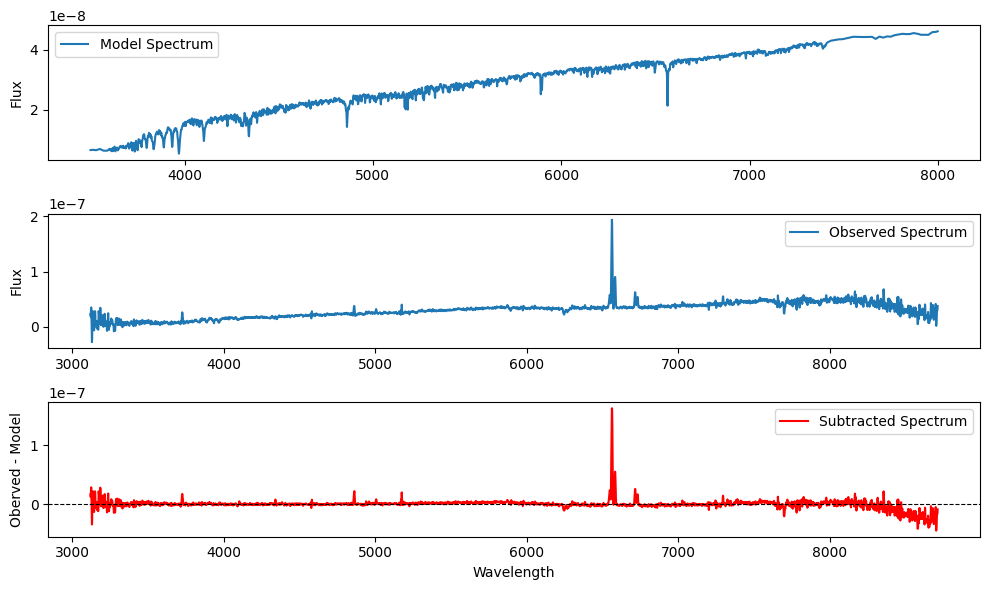

In [47]:
#Then Subtract model_abs from modified_observed
import numpy as np
import matplotlib.pyplot as plt

# model spectrum (flux1 and wave1)
wave1 = lambd1
flux1 = fluxmag1

#  observed spectrum (flux2 and wave2)
wave2 = lambd2 
flux2 = fluxmag2

# Interpolate model spectrum to align with the observed spectrum
interpolated_flux1 = np.interp(wave2, wave1, flux1)

# Subtract model from observed spectrum
subtracted_spectrum = flux2 - interpolated_flux1

# Plot the original model and observed spectra, and the subtracted spectrum
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(wave1, flux1, label='Model Spectrum')
plt.legend()
plt.ylabel('Flux')

plt.subplot(3, 1, 2)
plt.plot(wave2, flux2, label='Observed Spectrum')
plt.legend()
plt.ylabel('Flux')

plt.subplot(3, 1, 3)
plt.plot(wave2, subtracted_spectrum, label='Subtracted Spectrum', color='red')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Zero line for reference
plt.legend()
plt.xlabel('Wavelength')
plt.ylabel('Oberved - Model')

plt.tight_layout()
plt.show()


In [26]:
#subtracted spectrum
wave2[0:5], subtracted_spectrum[0:5]

(<Column name='waveAng' dtype='float64' length=5>
 3120.689655
 3122.265816
 3123.841976
 3125.418136
 3126.994297,
 <Column name='fluxmaggies_adj' dtype='float64' length=5>
 1.6698936001700385e-08
 1.2398936001700386e-08
 2.3898936001700386e-08
 2.8798936001700384e-08
 1.0998936001700386e-08)

In [48]:
file_moda='/Users/adaezeibik/Thesis_related/PS11aop_work/paper-figures/modifiedspectraPS11aop-subz.csv'
data_moda = ascii.read(file_moda,format='csv')

lambd2 = data_moda['waveAng'] 
fluxmag2 = data_moda['fluxAng']

#plt.plot(data_moda['waveAng'],data_moda['fluxAng'], color='blue', label='first run')
#plt.plot(wave2, subtracted_spectrum, color='red', label='second run')

In [49]:
#convert subtracted_spectrum from maggies to Amstrong
flux_Ang2 = convert_maggie2Angstron(subtracted_spectrum,wave2)


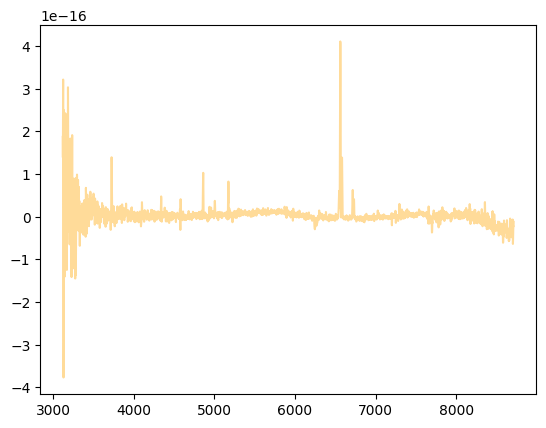

In [50]:
plt.plot(wave2, flux_Ang2,'orange',alpha=0.4, label='subtracted spectrum')

In [35]:
#Save result in a csv file
from astropy.io import ascii
file_out = 'modifiedspectraPS11aop-without2-subz2.csv' #subracted-rest-frame version
data = [wave2, flux_Ang2] 
names = ['waveAng','fluxAng']
ascii.write(data,file_out,names=names,overwrite=True,format='csv') #

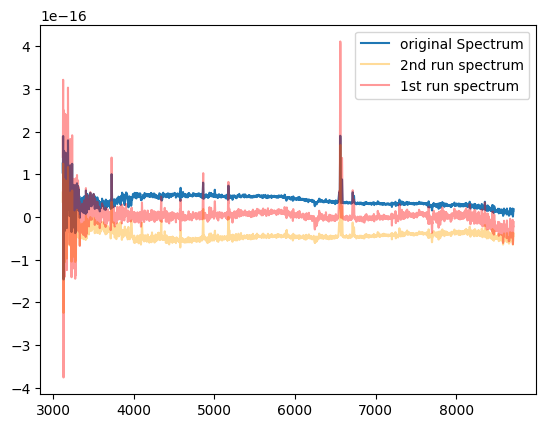

In [39]:
#There is no need for correcting for Extinction again since this has been donwe to the original file (PS1-11aop-host-dered.flm)

file_modb = pd.read_csv('/Users/adaezeibik/virtual_ubuntu/PS1-11aop/PS1-11aop-host-dered.flm',sep='\s+')
spec_wave = file_modb.iloc[:, 0]
spec_fd1 = file_modb.iloc[:, 1]*1e-15

plt.plot(spec_wave, spec_fd1, label='original Spectrum')
plt.plot(wave2, flux_Ang2,'orange',alpha=0.4, label='2nd run spectrum')
plt.plot(lambd2, fluxmag2, 'red',alpha=0.4, label='1st run spectrum')
plt.legend()

(7.9, 9.4)

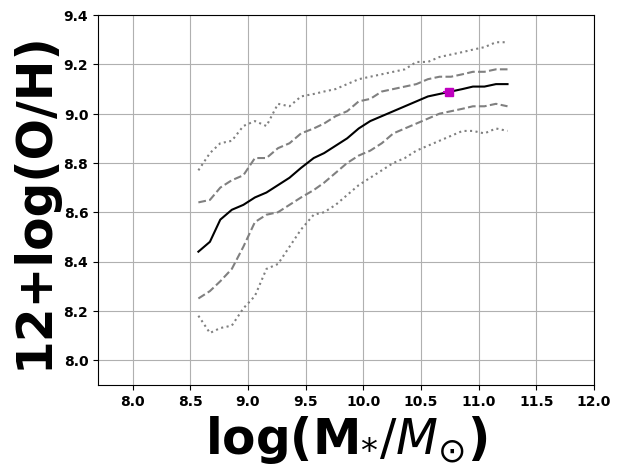

In [41]:
df2 = pd.read_csv('/Users/adaezeibik/Downloads/TremontiSDSSv2.dat', sep=" ")
plt.plot(df2[';Log(M/Msun)'] ,df2['P(2.5),'],':', color='gray')
plt.plot(df2[';Log(M/Msun)'] ,df2['P(16),'],'--', color='gray')
plt.plot(df2[';Log(M/Msun)'] ,df2['P(50),'], color='k')
plt.plot(df2[';Log(M/Msun)'] ,df2['P(84),'],'--', color='gray')
plt.plot(df2[';Log(M/Msun)'] ,df2['P(97.5)'],':', color='gray')

#Ps1-11aop
plt.errorbar(10.74, 9.089,xerr=0.05, yerr=0.004, fmt='s', color='m')

from matplotlib import rc,rcParams
#rc('font', weight='bold')
plt.tick_params(labelsize=10)
plt.grid()
plt.ylabel(r'12+log(O/H)', fontsize=35, fontweight='bold') #
plt.xlabel(r'log(M$_{*}/M_{\odot}$)', fontsize=35, fontweight='bold')
#plt.legend(loc='upper left',fontsize = 18)
plt.xlim(7.7,12.0)
#plt.xlim(7.7,13)
plt.ylim(7.9,9.4)

#plt.savefig('met-mass.png',bbox_inches='tight',dpi = 500, transparent = True)